# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Import Dataset

In [2]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [3]:
# Check dataset
customers = pd.read_csv('/content/Mall_Customers.csv')
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploratory Data Analysis (EDA)

In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Univariate Analysis

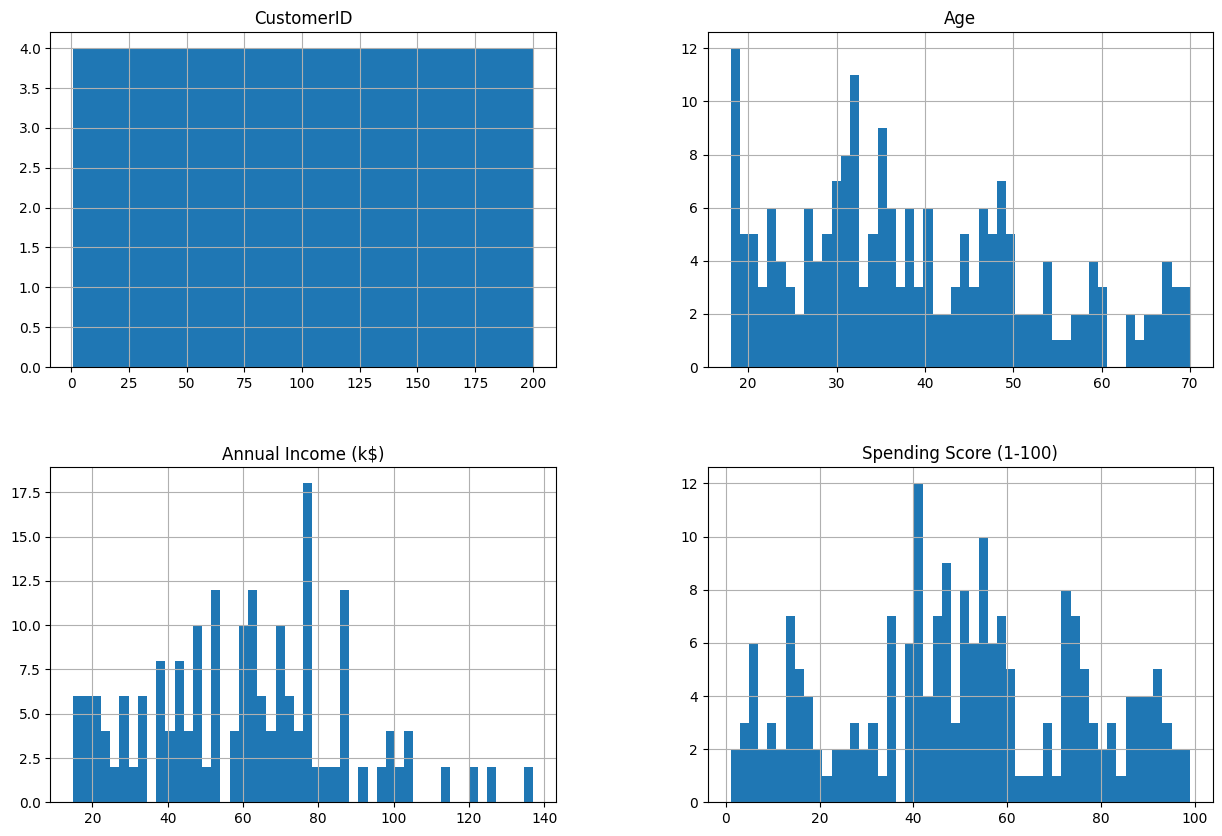

In [23]:
# analysis of the number of unique values in each feature
customers.hist(bins=50, figsize=(15,10))
plt.show()

## Multivariate Analysis

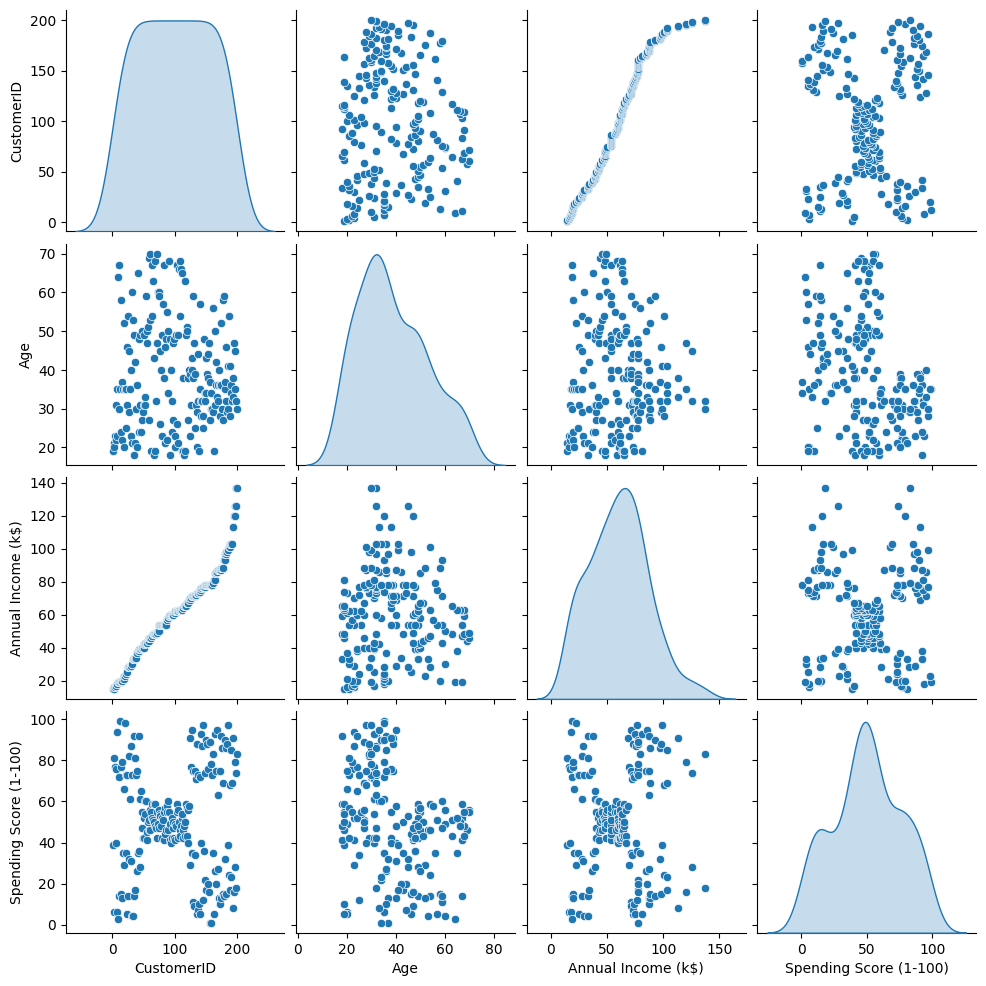

In [24]:
# analysis of the relationship between numerical features
sns.pairplot(customers, diag_kind = 'kde')

# Data Preparation

In [25]:
# For this segmentation analysis, we are primarily interested in 'Annual Income' and 'Spending Score'
# Create a new numpy array X containing only these two features
X = customers.iloc[:, [3, 4]].values

In [26]:
# Use the Elbow Method
print("\nCalculating WCSS for the Elbow Method...")
wcss = []
for i in range(1, 11):
    # n_init=10 is the default and suppresses a future warning.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    # kmeans.inertia_ returns the WCSS value for an already fitted model.
    wcss.append(kmeans.inertia_)


Calculating WCSS for the Elbow Method...


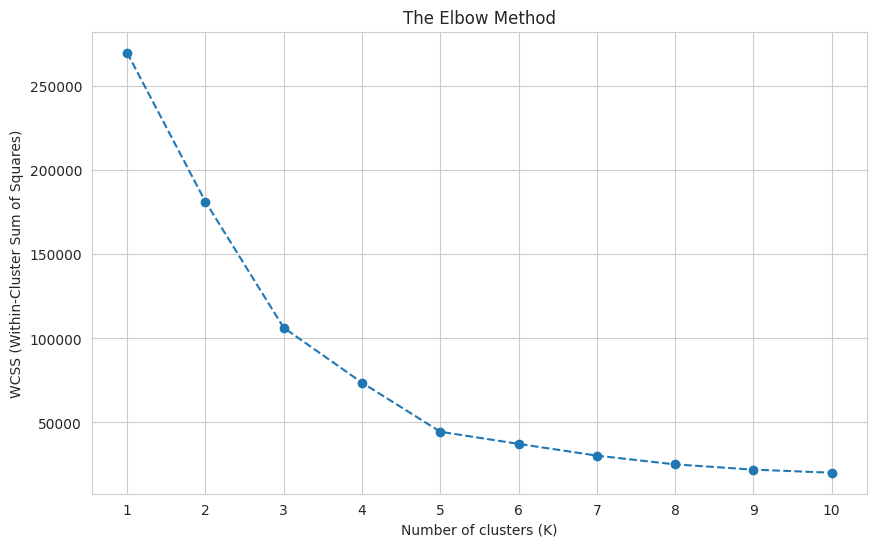

In [27]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(np.arange(1, 11, 1))
plt.show()

From the plot, we can observe a distinct elbow at K=5.
This suggests that 5 is the optimal number of clusters for this dataset.

# Training Model

In [28]:
print("\nTraining the K-Means model with K=5...")
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
# fit_predict computes cluster centers and predicts cluster index for each sample.
y_kmeans = kmeans.fit_predict(X)

# y_kmeans now holds the cluster label (from 0 to 4) for each customer.
print("Cluster labels for the first 10 customers:")
print(y_kmeans[:10])


Training the K-Means model with K=5...
Cluster labels for the first 10 customers:
[4 2 4 2 4 2 4 2 4 2]


# Visualization Clustering Customers


Visualizing the customer segments...


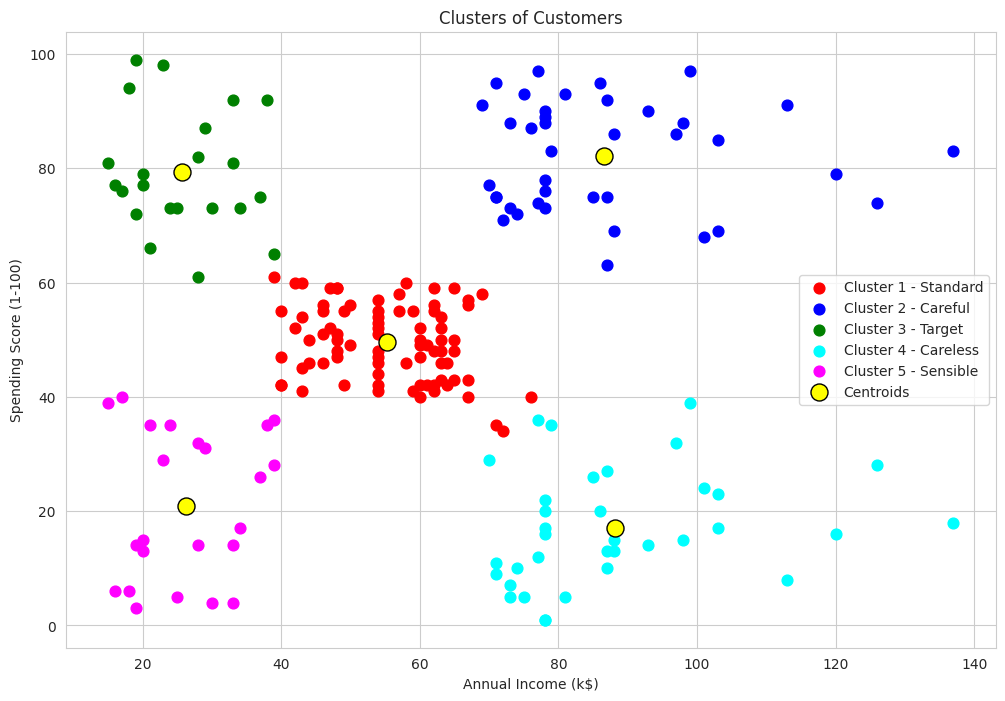


--- Analysis Complete ---
The plot above shows the five distinct customer segments based on their income and spending habits.


In [29]:
print("\nVisualizing the customer segments...")
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster 1 - Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster 2 - Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster 3 - Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'cyan', label = 'Cluster 4 - Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'magenta', label = 'Cluster 5 - Sensible')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids', edgecolors='black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

print("\n--- Analysis Complete ---")
print("The plot above shows the five distinct customer segments based on their income and spending habits.")